# Support Vector Machines

### Linear case

In this first part, we deal with a linear SVM. In this simple version, SVM reduces to a linear classfier $h(x)$ (or Linear Discriminant Analysis) parametrized by $\mathbf{w}$ and $b$ separating space by the hyperplane equation $\mathbf{w} \cdot \mathbf{x} + b = 0$

Formally, we set $(\mathbf{x_i},y_i)_{i=1}^n$ a set of $n$ training points,
with $\mathbf{x_i} \in \mathbb{R}^d$ and $y_i \in \{ -1, 1\}.$
We then solve for $\mathbf{w},b$:
\begin{array}{ll}
\mbox{minimize } &\frac{1}{2}~||\mathbf{w}||^2 + C \sum_{i=1}^n \zeta_i \\
\mbox{under constraints } &
\forall i, \quad y_i(\mathbf{w}\cdot\mathbf{x_i} +  b) \geq 1 - \zeta_i  \\
 & \forall i,\quad \zeta_i  \geq 0\\
\end{array}

We then obtain a series of coefficients $(\alpha_i)_{i=1}^n, \alpha_i \geq 0$ and

$\mathbf{w}=\sum_{i=1}^n \alpha_i y_i \mathbf{x_i}$

$h(\mathbf{x}) =  \mathbf{w}.\mathbf{x} + b$


vecotrs $\mathbf{x_i}$ such that $\alpha_i > 0$ are called support vectors.

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.svm import LinearSVC
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [7]:
def plot_boundary(clf, X, y):
    h = 0.002 ## grid mesh size
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1 
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) ## prediction value by zone
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=[5,5]) ## equal x and y lengths for a squared figure
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, s = 100)
    plt.title('score : ' + str(clf.score(X,y)))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.xlim([0,1])
    plt.ylim([0,1])


### Questions :
    
- Linearly separable case :    
   - Generate a linearly separable training set made of 50 examples with 2 features named $x_1,x_2$ (for instance, positive labels when $x_1 >0$).
   - Plot this training set with colored labels (markers).
   - Train a linear SVM (*from sklearn.svm import LinearSVC*).
   - Plot the decision frontier (use *plot_boundary*, provided below).

- "Not really linearly separable" case:
   - On this set, add noise to the label $y$: i.e. with probability $ p $, flip the label: $ y_i = 1-y_i $.
   - Plot this noisy training set.
   - Make a test set (drawn from the same distribution). 
   - Train a linear SVM and vary the parameter C. For each value of C, compute the train and test error (and plot the decision boundary). 

- XOR case:
     - generate the following training set:
         X = [(0,0), (1,0), (0,1), (1,1)] and y = (1,0,0,1)
     - plot this training set with color labels.
     - train a linear SVM (from sklearn.svm import LinearSVC)
     - display the decision frontier

### Non linear case:

The "Kernel trick" allows to extend the hypothesis space $H(x)$ 
The idea is to embed the training data into a space of higher dimension (the so-called *feature space*).
This is done using a function $\phi(x)$.

The decision function $h(x)$ thus reads:

\begin{align} h(\mathbf{x}) =&  \sum_{i=1}^n \alpha_i y_i \phi(x_i) \cdot \phi(x) + b 
\\
=& \sum_{i=1}^n \alpha_i y_i K(\mathbf{x_i},\mathbf{x}) + b. 
\end{align}


#### Kernels : 

The kernel function $K(\mathbf{x},\mathbf{x'})$ is generlaly one of the following: 

- linear (no Kernel trick): $\langle x, x'\rangle.$

- polynomial: $(\gamma \langle x, x'\rangle + r)^d.$  where the degree $d$ is specified by the argument $degree$, r by $coef0$.

- Gaussian: $\exp(-\gamma |x-x'|^2).$ where $\gamma > 0$ is specified by the argument $gamma$.

- sigmoidal : $(\tanh(\gamma \langle x,x'\rangle + r))$, where $r$ is specified by the argument $coef0.$           

### Questions : 
- We need to generate non linearly separable data and display them with colors. We can use:
    - *from sklearn.datasets import make_moons* 
    - *X, y = make_moons(noise = 0.1)*

- With the same method, generate a test set.

- Train a SVM for each possible kernel, with a couple values of $C$ values each time.

- We can diaply the support vectors using the attribute $support\_vectors\_$

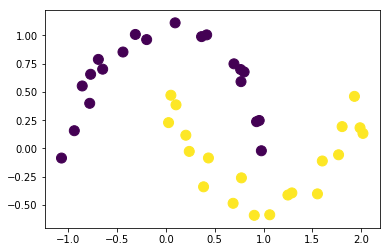

In [10]:
from sklearn.svm import SVC
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.datasets import make_moons
X, y = make_moons(noise = 0.1, random_state=1, n_samples=40)
plt.scatter(X[:,0],X[:,1], c = y, s = 100)

### Conclusion :     

On the hand-written digits (MNIST):
   - Train a decision tree 
   - Train a SVM 
   - Compare the results
   
In both cases, choose appropriate hyperparameters (using either train+test or simply test set).

For measuring scores, of course, you must use a validation set.

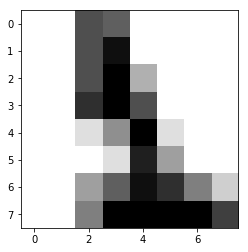

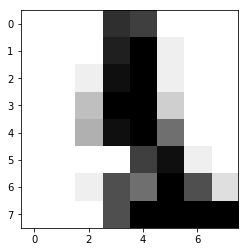

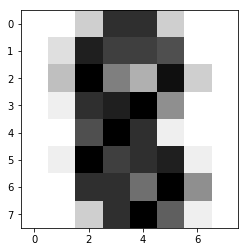

In [17]:
# Load the reduced-MNIST data (1800 images of 8x8)
from sklearn import datasets

digits = datasets.load_digits()
images = digits.images
n_samples = len(digits.images)

X = images.reshape((n_samples, -1))
y = digits.target

for image in images[np.random.choice(range(n_samples),3)]:
    plt.figure()
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

In [18]:
X_train = X[0:n_samples // 2]
y_train = y[0:n_samples // 2]

X_test = X[n_samples // 2:(n_samples*3//4)]
y_test = y[n_samples // 2:(n_samples*3//4)]

X_valid = X[(n_samples*3//4):]
y_valid = y[(n_samples*3//4):]

print("X_train : {} examples, with 8*8 = {} features.".format(X_train.shape[0], X_train.shape[1]))

X_train : 898 examples, with 8*8 = 64 features.
